In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df=pd.read_excel('P1-OfficeSupplies.xlsx')

In [11]:
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,2014-07-04,East,Richard,Pen Set,62,4.99
1,2014-07-12,East,Nick,Binder,29,1.99
2,2014-07-21,Central,Morgan,Pen Set,55,12.49
3,2014-07-29,East,Susan,Binder,81,19.99
4,2014-08-07,Central,Matthew,Pen Set,42,23.95


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderDate   43 non-null     datetime64[ns]
 1   Region      43 non-null     object        
 2   Rep         43 non-null     object        
 3   Item        43 non-null     object        
 4   Units       43 non-null     int64         
 5   Unit Price  43 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.1+ KB


<AxesSubplot:xlabel='Region', ylabel='Units'>

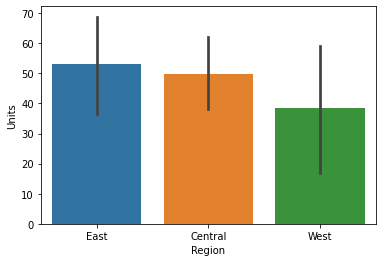

In [23]:
sns.barplot(x='Region',y='Units',data=df)

In [24]:
import numpy as np

<AxesSubplot:xlabel='Region', ylabel='Units'>

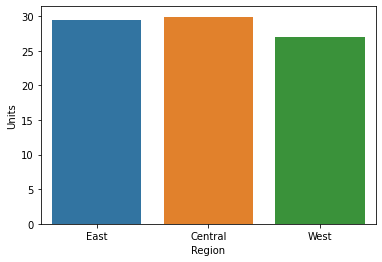

In [30]:
sns.barplot(x='Region',y='Units',data=df,estimator=np.std,ci=None)
#ci argument which is set to 95% by default. which gives you the errors bars

<AxesSubplot:xlabel='Region', ylabel='count'>

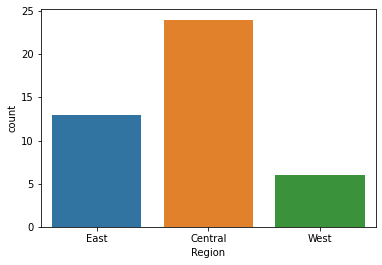

In [33]:
sns.countplot(x='Region',data=df)

In [15]:
hm=df.pivot_table(index='Item',columns='Region',values='Units')

In [19]:
hm

Region,Central,East,West
Item,,,
Binder,53.000000,46.800000,32.0
Desk,3.500000,NaN,3.0
Pen,27.000000,58.333333,76.0
Pen Set,60.750000,50.666667,NaN
Pencil,55.333333,65.000000,44.0


<AxesSubplot:xlabel='Region', ylabel='Item'>

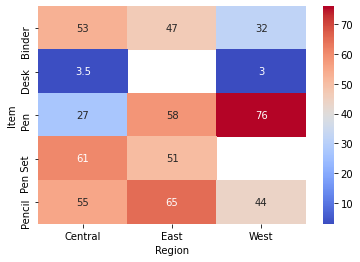

In [20]:
sns.heatmap(hm,annot=True,cmap='coolwarm')

In [35]:
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,2014-07-04,East,Richard,Pen Set,62,4.99
1,2014-07-12,East,Nick,Binder,29,1.99
2,2014-07-21,Central,Morgan,Pen Set,55,12.49
3,2014-07-29,East,Susan,Binder,81,19.99
4,2014-08-07,Central,Matthew,Pen Set,42,23.95


In [37]:
cl=df.pivot_table(index='Item',columns='Rep',values='Units')

In [53]:
cl.dropna(thresh=6)

Rep,Alex,Bill,James,Matthew,Morgan,Nick,Rachel,Richard,Smith,Susan,Thomas
Item,,,,,,,,,,,
Binder,52.5,63.0,7.0,50.0,28.0,29.0,28.000000,41.333333,87.0,81.0,57.0
Pencil,63.0,30.0,56.0,NaN,90.0,NaN,51.666667,65.000000,67.0,NaN,32.0


In [54]:
cl.fillna(value=0)

Rep,Alex,Bill,James,Matthew,Morgan,Nick,Rachel,Richard,Smith,Susan,Thomas
Item,,,,,,,,,,,
Binder,52.5,63.0,7.0,50.0,28.0,29.0,28.000000,41.333333,87.0,81.0,57.0
Desk,0.0,0.0,3.0,5.0,0.0,0.0,0.000000,0.000000,2.0,0.0,0.0
Pen,0.0,27.0,76.0,0.0,0.0,96.0,0.000000,64.000000,0.0,15.0,0.0
Pen Set,50.0,0.0,0.0,69.0,55.0,0.0,0.000000,39.000000,0.0,74.0,0.0
Pencil,63.0,30.0,56.0,0.0,90.0,0.0,51.666667,65.000000,67.0,0.0,32.0


<AxesSubplot:xlabel='Rep', ylabel='Item'>

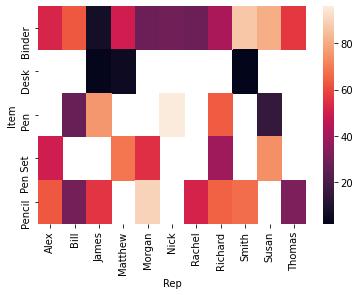

In [57]:
sns.heatmap(cl)

In [63]:
hm.fillna(value=0,inplace=True)

In [67]:
hm

Region,Central,East,West
Item,,,
Binder,53.000000,46.800000,32.0
Desk,3.500000,0.000000,3.0
Pen,27.000000,58.333333,76.0
Pen Set,60.750000,50.666667,0.0
Pencil,55.333333,65.000000,44.0


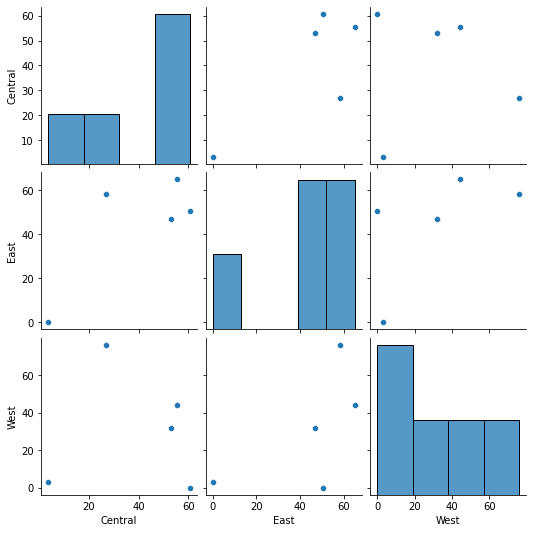

In [69]:
sns.pairplot(hm)

In [75]:
import matplotlib as plt

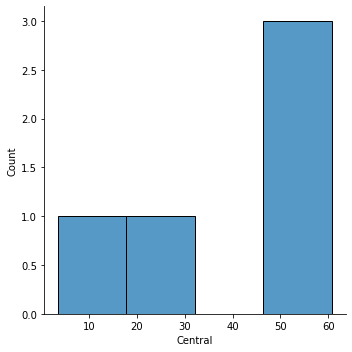

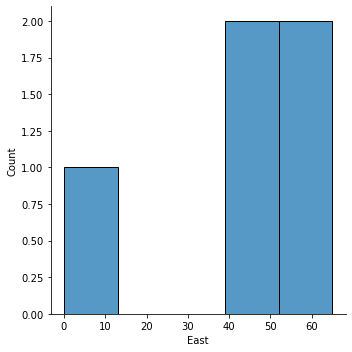

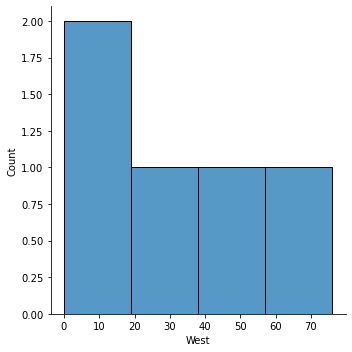

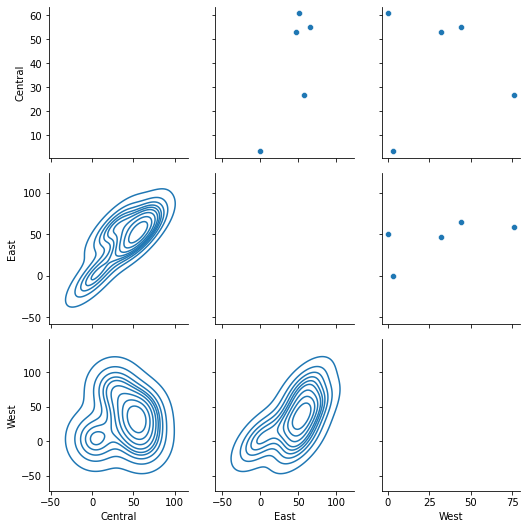

In [86]:
g=sns.PairGrid(hm)
g.map_diag(sns.displot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

In [125]:
df['Total']=df['Units']*df['Unit Price']

In [127]:
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price,Total
0,2014-07-04,East,Richard,Pen Set,62,4.99,309.38
1,2014-07-12,East,Nick,Binder,29,1.99,57.71
2,2014-07-21,Central,Morgan,Pen Set,55,12.49,686.95
3,2014-07-29,East,Susan,Binder,81,19.99,1619.19
4,2014-08-07,Central,Matthew,Pen Set,42,23.95,1005.90


<Figure size 720x216 with 0 Axes>

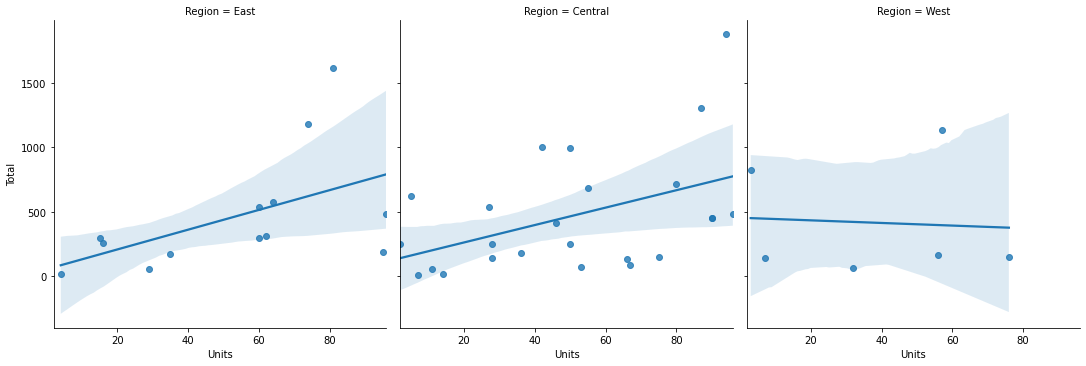

In [142]:
plt.figure(figsize=(10,3))
sns.lmplot(x='Units',y='Total',data=df,col='Region')